In [1]:
# check installed version
import pycaret
# import pycaret clustering and init setup
from pycaret.clustering import *
import pandas as pd
import datetime
pycaret.__version__

'3.0.4'

### ingest and setup

In [2]:
m2_pipeline = pd.read_csv('pipeline1.csv')

In [3]:
#change is surge price rate of change per observation, change.1 is precursor
#sum_change is surge sum_change per surge, and surge_area is surge alone
keepable = ['precursor_buy_cap_pct_change', 
            'precursor_ask_cap_pct_change',
            'precursor_bid_vol_pct_change', 
            'precursor_ask_vol_pct_change', 'change.1',
            'surge_targets_met_pct']
m2_pipeline = m2_pipeline[keepable]

In [4]:
m2_pipeline

,precursor_buy_cap_pct_change,precursor_ask_cap_pct_change,precursor_bid_vol_pct_change,precursor_ask_vol_pct_change,change.1,surge_targets_met_pct
0,NaN,NaN,NaN,NaN,-0.000533,NaN
1,-0.000443,0.000023,-0.000184,0.003196,0.000135,-0.033490
2,-0.002358,-0.000002,-0.000818,-0.000333,-0.000233,-0.033445
3,0.000349,0.000031,0.000189,0.004485,-0.000502,-0.033467
4,0.000473,0.000015,0.000120,0.001861,-0.000768,-0.167224
...,...,...,...,...,...,...
5632,-0.008493,-0.001014,-0.002097,-0.004181,-0.283913,0.000000
5633,-0.002290,0.000014,-0.000566,0.000067,0.000399,0.000000
5634,-0.002373,-0.000333,-0.000586,-0.001572,0.000000,-0.099701
5635,0.003724,0.000931,0.000911,0.004449,0.000000,-0.099800


In [5]:
m2_pipeline = m2_pipeline.dropna()
print(m2_pipeline.isna().sum(axis=1).astype(bool).sum())


0


In [6]:
m2_pipeline.columns

Index(['precursor_buy_cap_pct_change', 'precursor_ask_cap_pct_change',
       'precursor_bid_vol_pct_change', 'precursor_ask_vol_pct_change',
       'change.1', 'surge_targets_met_pct'],
      dtype='object')

In [7]:
m2_pipeline.dtypes

precursor_buy_cap_pct_change    float64
precursor_ask_cap_pct_change    float64
precursor_bid_vol_pct_change    float64
precursor_ask_vol_pct_change    float64
change.1                        float64
surge_targets_met_pct           float64
dtype: object

In [8]:
m2_pipeline = m2_pipeline.astype('float')

In [9]:
m2_pipeline.dtypes

precursor_buy_cap_pct_change    float64
precursor_ask_cap_pct_change    float64
precursor_bid_vol_pct_change    float64
precursor_ask_vol_pct_change    float64
change.1                        float64
surge_targets_met_pct           float64
dtype: object

In [10]:
#HOME
s = setup(m2_pipeline, session_id = 42)

,Description,Value
0,Session id,42
1,Original data shape,"(5634, 6)"
2,Transformed data shape,"(5634, 6)"
3,Numeric features,6
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [11]:
# import ClusteringExperiment and init the class
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()

In [12]:
# check the type of exp
type(exp)

pycaret.clustering.oop.ClusteringExperiment

In [13]:
# init setup on exp
exp.setup(m2_pipeline, session_id = 42)

,Description,Value
0,Session id,42
1,Original data shape,"(5634, 6)"
2,Transformed data shape,"(5634, 6)"
3,Numeric features,6
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [14]:
# to check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


### discover optimal clustering, then initiate clustering algo

In [15]:
# train kmeans model
mtext = 'meanshift'
m = create_model(mtext)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5060,25178.8442,0.4990,0,0,0


In [16]:
mtext='kmeans'
m2 = create_model(mtext)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6468,117946.4737,0.4282,0,0,0


In [17]:
mtext='ap'
m3 = create_model(mtext)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3279,100997.2256,0.9520,0,0,0


In [18]:
mtext = 'sc'
m4= create_model(mtext)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8894,20.9385,0.1203,0,0,0


In [19]:
mtext = 'hclust'
m5 = create_model(mtext)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5545,102600.0554,0.4883,0,0,0


In [20]:
mtext = 'dbscan'
m6 = create_model(mtext)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9627,360.3954,1.8848,0,0,0


In [21]:
mtext = 'optics'
m7 = create_model(mtext)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.6003,0.7866,2.0054,0,0,0


In [22]:
mtext = 'birch'
m8 = create_model(mtext)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8963,55309.4700,0.2892,0,0,0


### assign model

In [78]:
cluster = assign_model(m4)
model_text = 'sc'
cluster

,precursor_buy_cap_pct_change,precursor_ask_cap_pct_change,precursor_bid_vol_pct_change,precursor_ask_vol_pct_change,change.1,surge_targets_met_pct,Cluster
1,-0.000443,0.000023,-0.000184,0.003196,0.000135,-0.033490,Cluster 0
2,-0.002358,-0.000002,-0.000818,-0.000333,-0.000233,-0.033445,Cluster 0
3,0.000349,0.000031,0.000189,0.004485,-0.000502,-0.033467,Cluster 0
4,0.000473,0.000015,0.000120,0.001861,-0.000768,-0.167224,Cluster 0
5,0.006050,0.000020,0.002144,0.003015,-0.000303,-0.371245,Cluster 0
...,...,...,...,...,...,...,...
5631,0.000261,-0.003409,0.000050,-0.016427,-0.000398,-0.199005,Cluster 0
5632,-0.008493,-0.001014,-0.002097,-0.004181,-0.283913,0.000000,Cluster 0
5633,-0.002290,0.000014,-0.000566,0.000067,0.000399,0.000000,Cluster 0
5634,-0.002373,-0.000333,-0.000586,-0.001572,0.000000,-0.099701,Cluster 0


### push clustered df to csv (Finish pipeline step)

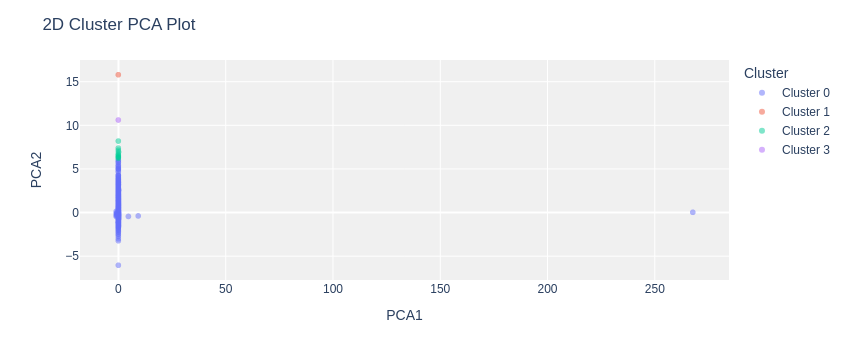

In [79]:
# plot pca cluster plot 
plot_model(m4, plot = 'cluster')

In [59]:
# plot elbow, not for ap
# plot_model(m, plot = 'elbow')

In [60]:
cluster.dtypes

precursor_buy_cap_pct_change    float32
precursor_ask_cap_pct_change    float32
precursor_bid_vol_pct_change    float32
precursor_ask_vol_pct_change    float32
change.1                        float32
surge_targets_met_pct           float32
Cluster                          object
dtype: object

In [80]:
#occurences per year
cluster.groupby('Cluster').count()#  _value_counts()
# x = (17 / 5617) * 900
# print(x)

,precursor_buy_cap_pct_change,precursor_ask_cap_pct_change,precursor_bid_vol_pct_change,precursor_ask_vol_pct_change,change.1,surge_targets_met_pct
Cluster,,,,,,
Cluster 0,5622,5622,5622,5622,5622,5622
Cluster 1,1,1,1,1,1,1
Cluster 2,10,10,10,10,10,10
Cluster 3,1,1,1,1,1,1


In [62]:
# plot silhouette
# plot_model(m, plot = 'silhouette')

In [81]:
evaluate_model(m4)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [82]:
# # predict on test set

# # m5 = create_model(mtext)
# sc_pred = predict_model(m4, data=m2_pipeline)
# sc_pred

TypeError: Model doesn't have the predict method.

### eliminate rows with cluster membership under two, for step3 purposes

In [67]:
# # Group the DataFrame by the Cluster column
# grouped = sc_pred.groupby('Cluster')

# # Filter out rows that belong to only one cluster
# filtered = grouped.filter(lambda x: len(x) > 1)

NameError: name 'sc_pred' is not defined

In [73]:
# filtered.columns

In [83]:
# Group the DataFrame by the Cluster column
grouped = cluster.groupby('Cluster')

# Filter out rows that belong to only one cluster
filtered = grouped.filter(lambda x: len(x) > 1)

In [84]:
now = datetime.datetime.now()
print("Current date and time: ")
print(now.strftime("%Y-%m-%d %H:%M:%S"))

model_type = model_text  #from above cell
run_time = now.strftime("%Y-%m-%d %H:%M:%S")
file_name = 'clustered/'+ 'clustered_'+ model_type+' _'+ run_time+ '.csv'
print(file_name)
filtered.to_csv(file_name)

Current date and time: 
2023-09-09 19:45:53
clustered/clustered_sc _2023-09-09 19:45:53.csv
